# Practical statistics for Data Scientists

Nesse notebook você verá meu resumo e estudo pessoal sobre estatística, me guiando pelo livro Practical statistics for Data Scientists.

Inicialmente, vale a pena observar que os principais objetivos do livro são:

1. De forma fácil, apontar quais são os conceitos chaves para estatística que são relevantes para Data Science;

2. Explicar quais conceitos são importantes e úteis na perspectiva da Ciência de Dados, quais são menos, e o porquê. 

## 1. Exploratory Data Analysis

Como disciplina, a Estatística foi desenvolvida, em sua maioria, no século passado. A Teoria da Probabilidade, a base matemática da estatística, foi desenvolvida entre os séculos 17 e 19, baseada nos trabalhos de:
- Thomas Bayes;
- Pierre-Simon Laplace;
- Carl Gauss
Esse capítulo foca nos primeiros passos de um projeto de Ciência de Dados, a Análise Exploratória de Dados (EDA).

<b>Importante</b>: A estatística clássica foca quase exclusivamente em <b>inferência</b>, um complexo conjunto de procedimentos para tirar conclusões sobre grandes populaçãos tomando como base pequenas amostras.

A Análise de Dados como disciplina foi proposta por John W. Tukey em 1962, onde ele incluiu a inferência estatística como só um componente, unindo engenharia e ciência de dados.

### 1.1 Elements of Structured Data

Dados são obtidos por várias fontes:
- Sensores
- Eventos
- Texto
- Imagens
- Vídeos

A Internet das Coisas produz uma massa de dados gigantesca e, em sua maioria, esses dados são desestruturados:
- Imagens são conjuntos de pixels onde cada pixel contém informação de cor RGB (red, green, blue)
- Textos são sequências de palavras e caracteres, geralmente organizados por seção, subseção
- Clickstreams são sequências de ações feitas pelo usuário interagindo com um app ou uma página web.
Boa parte do desafio da Ciência de Dados é transformar esses dados em informações úteis, ou seja, precisam ser processados e manipulados para uma forma estruturada.

#### Tipos de Dados:
- Contínuo: float, interval, numeric
- Discreto: int, integer, count
- Categórico: enums, enumerated, factors, nominal
- Binários: logical, boolean
- Ordinário: dados categóricos que possuem ordem

#### Dados estruturados:
- Numérico:
    - Contínuo, como a velocidade do vendo ou a duração de tempo;
    - Discreto, como a contagem de ocorrência de um evento
   
- Categórico:
    - Conjunto fixo de dados, como o tipo da tela de uma TV (plasma, LCD, LED, etc.)
    - Nome de um estado (Alabama, Alaska, etc.)
    - Binário é um tipo de dado categórico muito especial, onde ele pode ter apenas dois valores, como 0/1, yes/no ou true/false.
    - Ordinário, quando as categorias possuem ordem, como a numeração de notas (1, 2, 3, 4...)
    
#### Qual a importância de conhecer o tipo de dados?
Quando falamos de análise de dados e predição de modelos, o tipo do dado é importante para ajudar a determinar o tipo de visualização, a forma como a análise será feita ou o modelo estatístico será usado.

### 1.2 Rectangular Data

A estrutura de "dados retangulares" é a estrutura de referência típica para análises de Data Science, como planilhas e tabelas.

Elementos de "dados retangulares"
- Data frame: planilha/tabela é a estrutura básica de dados para Modelos Estatísticos e de Machine Learning;
- Feature: são as colunas da tabela, também chamado de variáveis, atributos ou inputs;
- Outcome: muitos projetos de ciência de dados envolvem a predição de um resultado. As features são usadas para prever o resultado. também chamado de variável dependente, resposta, alvo ou output
- Records: são as linhas da tabelas, também chamadas de registros ou observações, amostras, exemplos ou casos.

Exemplo de um típico formato de dado:

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Base de dados tem uma ou mais colunas definidas como index e isso pode facilitar muito as consultas a serem feitas, até mesmo no SQL. No Python, a bibioteca Pandas a estrutura de dados retangular é transformada em um objeto DataFrame. Já em R, a estrutura é um objeto data.frame. Quando falamos de multiníveis de index, ambos suportam, mas o objeto data.frame é significantemente mais rápido do que o primeiro.


### 1.3 Nonrectangular Data Structures

Existem outras estruturas de dados além da retangular: 
- Dados de séries temporais registram sucessivas medições de uma única variável ao longo do tempo, servindo de base para metódos estatísticos de previsão.
- Dados de espaço, que são usados em mapas e em análises espaciais, possuem estraturas mais complexas e variadas do que a estrutura retangular,
- Grafos são estruturas de dados usadas para representar fisicamente, socialmente e de forma abstratas, as relações. 
Cada um desses tipos de dados necessitam de uma metodologia diferente de ciência de dados. Nesse livro é abordado apenas situações de dados estruturados, a base das modelagens preditivas.

### 1.4 Estimates of Location

Variáveis com medidas ou contagem de dados tem centenas de valores distintos. Uma forma basica de explorar os dados é procurando um "valor típico" para cada feature (variável), um local estimado onde mais dos dados está localizado, um ponto central, uma forma de resumir uma distribuição em um único valor numérico. Temos os seguintes:

- Média: a soma de todos os valores divididos pelo número de valores

$ Média = \bar x = \dfrac {\sum_{i}^{n} x_{i}}{n} $

In [2]:
media_pop = data['Population'].mean()
media_murder = data['Murder.Rate'].mean()
print(f'Média de assassinatos = {round(media_murder,2)}')
print(f'Média da população = {round(media_pop,2)}')

Média de assassinatos = 4.07
Média da população = 6162876.3


- Média ponderada: a soma de todos os valores multiplicado pelo seu respectivo peso dividido pela soma dos pesos

$ Média Ponderada = \bar x_{w} = \dfrac {\sum_{i=1}^{n} x_{i}w_{i}}{\sum_{i}^{n} w_{i}} $

In [3]:
import numpy as np

media_ponderada_pop =  np.average(a= data['Population'], weights= data['Murder.Rate'])
media_ponderada_murder = np.average(a= data['Murder.Rate'], weights= data['Population'])
print(f'Média Ponderada de Assassinatos = {round(media_ponderada_murder,2)}')
print(f'Média Ponderada da População = {round(media_ponderada_pop,2)}')

Média Ponderada de Assassinatos = 4.45
Média Ponderada da População = 6738594.41


- Média truncada: a média de todos os valores depois de elimiar um valor fixo de valores extremos, tanto inferiores como superiores 

$ Média Truncada = \bar x = \dfrac {\sum_{i=p+1}^{n-p} x_{(i)}}{n-2p} $

In [55]:
from scipy import stats

#calculando a média truncada eliminando 10%
media_truncada_pop = stats.trim_mean(data['Population'], 0.1)
media_truncada_murder = stats.trim_mean(data['Murder.Rate'], 0.1)
print(f'Média Truncada da População = {round(media_truncada_pop,2)}')
print(f'Média Truncada de Assassinatos = {round(media_truncada_murder,2)}')

Média Truncada da População = 4783697.12
Média Truncada de Assassinatos = 3.94


#### Median and Robust Estimates

Como foi visto, para o cálculo da média é utilizado todos os valores presentes, fazendo com que seja uma medida sensível aos dados. Procurando uma estimativa mais robusta, onde valores destoantes do padrão são ignorados (outliers), temos a mediana e outras estimativas semelhantes (como a média truncada, que elimina valores extremos, tanto superiores como inferiores).

**Importante**: Um dado ser outlier não significa que ele é errado, pode realmente ser reflexo do evento, dependendo do contexto da análise. O importante é investigar se é um erro, um valor inválido ou se é algo natural. 

- Mediana: O valor tal que metade dos dados são menores do que ele e a outro metade são maiores. Quando temos os dados ordenados, a mediana está localizado no exato meio da sequência de números. Tão chamado de percentil 50. 1) Se o numero total de dados na coluna (*n*) é impar, então o valor é central, 2) se *n* é par, o valor é a média dos dois valores centrais.

In [5]:
mediana = data['Population'].median()
print(f'Mediana = {mediana}')

Mediana = 4436369.5


- Mediana Ponderada: O valor tal que metade das somas cumulativas dos pesos são menores do que ele e a outro metade são valores maiores. Os dados precisam estar ordenados

In [6]:
# Para essa métrica, é necessário instalar o pacote wquantiles 
#!pip install wquantiles

import wquantiles
mediana_ponderada = wquantiles.median(data['Murder.Rate'], weights= data['Population'])
print(f'Mediana ponderada = {mediana_ponderada}')

Mediana ponderada = 4.4


### 1.5 Estimates of Variability

No tópico passado vimos uma dimensão de resumos de features. Uma outra forma de resumir é a variabilidade, também chamada de dispersão. O coração da estatística está na variabilidade: medindo-a, reduzindo-a, distinguindo os dados aleatórios dos reais, identificando as várias fontes reais e fazendo decisões usando-a. Métricas para calcular a variabilidade:

- Desvios: a diferença entre os dados observados e um valor base. O desvio nos fala quão dispersos os dados estão em relação a um valor central, geralmente a média. Também chamado de erro ou resíduo. Unidade igual da feature

In [13]:
data['Erro'] = (data['Population'] - media_pop)
data.head()

,State,Population,Murder.Rate,Abbreviation,Erro
0,Alabama,4779736,5.7,AL,-1383140.3
1,Alaska,710231,5.6,AK,-5452645.3
2,Arizona,6392017,4.7,AZ,229140.7
3,Arkansas,2915918,5.6,AR,-3246958.3
4,California,37253956,4.4,CA,31091079.7


- Desvio médio absoluto: é a média dos valores absolutos dos desvios em relação a média. Também chamado de MAD ou MAE. Unidade igual ao da feature

$ MAE = \dfrac {\sum_{i=1}^{n} | x_{(i)}-\bar x|}{n} $

In [20]:
MAE = (sum(abs(data['Population'] - media_pop)))/data['Population'].count()
print(f'MAE = {round(MAE,2)}')

MAE = 4450933.36


- Variância: é a soma dos quadrados dos desvios divididos por *n*-1, onde *n* é a quantidade de dados. Unidade **NÃO** é a mesma da feature

$ Variancia = s^2 =  \dfrac {\sum (x -\bar x)^2}{n-1} $

In [44]:
variance = np.var(data['Population'])
print(f'Variância = {variance}')

Variância = 45960360825926.56


- Desvio Padrão: é a raiz quadrada da Variância

$ Desvio Padrão = s = \sqrt(Variancia) $

In [51]:
import math

std_1 = math.sqrt(variance)
print(f'Desvio Padrão (usando n-1 no denominador para cálculo da variância): {round(std_1,2)}')

std_2 = data['Population'].std()
print(f'Desvio Padrão (usando n no denominador para cálculo da variância): {round(std_2,2)}')



Desvio Padrão (usando n-1 no denominador para cálculo da variância): 6779407.11
Desvio Padrão (usando n no denominador para cálculo da variância): 6848235.35


- Desvio mediano absoluto: semelhante ao MAE, mas em relação à mediana

In [58]:
from statsmodels import robust

median_ae = robust.scale.mad(data['Population'])
print(f'Desvio mediano absoluto = {median_ae}')

Desvio mediano absoluto = 3849876.1459979336


- Range: diferença entre o maior e o menor valor do dataset

In [64]:
range_ =data['Population'].max() - data['Population'].min()
print(f' Range do dataset = {range_}')

 Range do dataset = 36690330


- Percentile: o valor tal que *P* percentual dos dados represente o valor ou menor, enquanto (100-P) percetual representa esse valor ou mais. Também chamado de quantil.

In [75]:
percentil_05 = np.percentile(data['Population'],5)
print(f'Percentil 05 = {round(percentil_05,2)}')

percentil_25 = np.percentile(data['Population'],25)
print(f'Percentil 25 = {round(percentil_25,2)}')

percentil_50 = np.percentile(data['Population'],50)
print(f'Percentil 50 = {round(percentil_50,2)}')

percentil_75 = np.percentile(data['Population'],75)
print(f'Percentil 75 = {round(percentil_75,2)}')

percentil_95 = np.percentile(data['Population'],95)
print(f'Percentil 95 = {round(percentil_95,2)}')

Percentil 05 = 689529.0
Percentil 25 = 1833004.25
Percentil 50 = 4436369.5
Percentil 75 = 6680312.25
Percentil 95 = 19118545.6


- Distância interquartil: é a diferença entre o percentil 75 e o percentil 25. Também chamado de IQR

In [74]:
IQR = percentil_75 - percentil_25
print(f'Distância interquartil = {IQR}')

Distância interquartil = 4847308.0


- Ordem estatistica: métricas baseadas nos valores ordenados dos menores para os maiores

### 1.6 Exploring the Data Distribution

Até aqui procuramos um jeito de resumir o conjunto de dados a um único número, para entender a localização e variabilidade dos dados. Porém isso também é útil para explorar como os dados estão distribuidos

- Boxplot: introduzido por Tukey como uma forma rápida de visualizar a distribuição dos dados. O topo da caixa e a base da caixa são os percentis 75 e 25 respectivamente. A mediana é mostrada na linha vertical que corta a caixa. As linhas que saem da caixa são chamadas de *whiskers* e não tem um valor específico, mas geralmente são representadas como 1.5 vezes o tamanho do IQR. Qualquer dado além dos *whiskers* são representados como pontos

Text(0.5, 0, 'Population (milhões)')

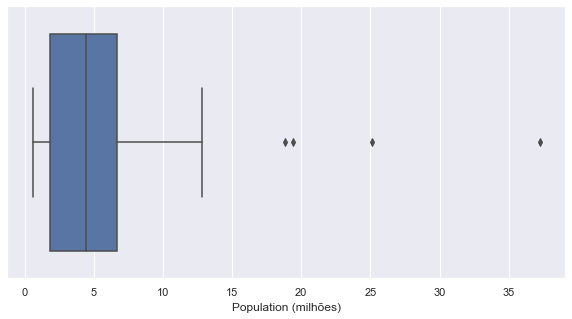

In [101]:
import seaborn as sns

ax = sns.boxplot(x = data['Population']/1000000, orient = 'x')
sns.set(rc={'figure.figsize':(5,2.5)})
ax.set_xlabel('Population (milhões)')

- Tabela de Frequência: a contagem de determinados valores que se enquadram dentro de determinados intervalos (bins)

Text(0, 0.5, 'Frequência')

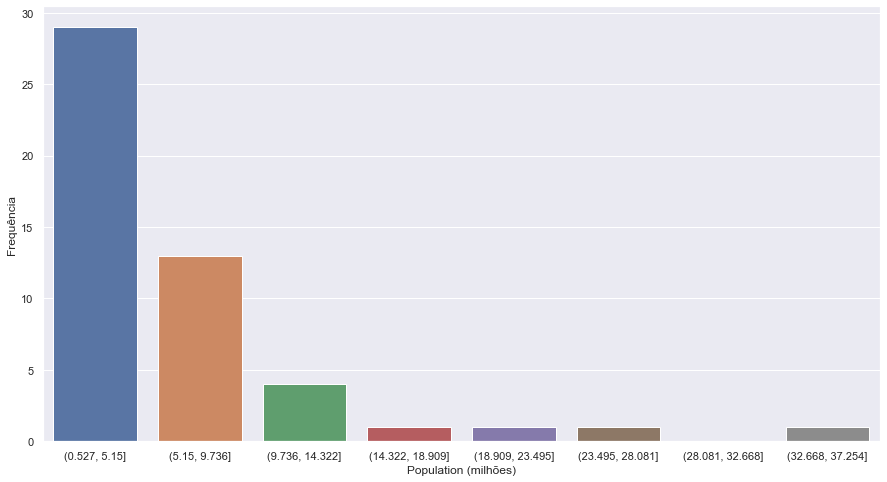

In [106]:
#necessário separar os dados no dataset para determinar os bins
intervalo_pop = pd.cut(data['Population']/1000000, 8)
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.countplot(x=intervalo_pop)
ax.set_xlabel('Population (milhões)')
ax.set_ylabel('Frequência')

- Histograma: um gráfico de frequência com bins no eixo X e as contagens (ou algo proporcional) no eixo Y

- Densidade: uma versão mais suave do histograma, com frequência baseado na Estimativa de Densidade Kernal

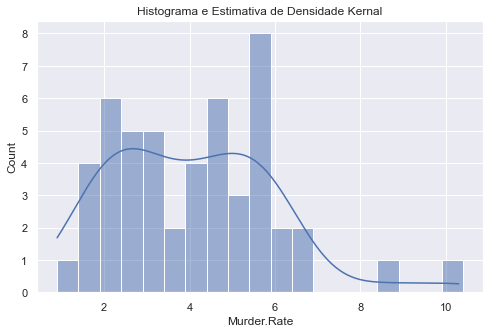

In [117]:
#intervalo_pop = pd.cut(data['Murder.Rate'], 8)
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.histplot(data['Murder.Rate'], binwidth=0.5, kde=True).set(title='Histograma e Estimativa de Densidade Kernal')